<Strong> SimpleRNN can be run in two different modes: it can return either the full sequences of successive outputs for each timestep or only the last output for each input sequence  </Strong>

In [28]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

model = Sequential()
model.add(Embedding(10000, 32 , input_length = 500))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 500, 32)           320000    
                                                                 
 simple_rnn_12 (SimpleRNN)   (None, 500, 32)           2080      
                                                                 
 simple_rnn_13 (SimpleRNN)   (None, 500, 32)           2080      
                                                                 
 simple_rnn_14 (SimpleRNN)   (None, 500, 32)           2080      
                                                                 
 simple_rnn_15 (SimpleRNN)   (None, 32)                2080      
                                                                 
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


<Strong>
    
It’s sometimes useful to stack several recurrent layers one after the other in order to increase the representational power of a network. In such a setup, you have to get all of the intermediate layers to return full sequence of outputs:
    
 </Strong>

In [29]:
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.layers import Dense

max_features = 10000
maxlen = 500
batch_size = 32

In [30]:
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

In [31]:
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)

In [32]:
model = Sequential() 
model.add(Embedding(max_features, 32 ,  name='embedding')) 
model.add(SimpleRNN(32)) 
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(input_train, y_train,epochs=10, batch_size=128,validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 17s 104ms/step - loss: 0.6011 - acc: 0.6679 - val_loss: 0.5385 - val_acc: 0.7272
Epoch 2/10
157/157 [==============================] - 16s 101ms/step - loss: 0.4025 - acc: 0.8343 - val_loss: 0.3761 - val_acc: 0.8492
Epoch 3/10
157/157 [==============================] - 15s 99ms/step - loss: 0.2919 - acc: 0.8845 - val_loss: 0.3772 - val_acc: 0.8354
Epoch 4/10
157/157 [==============================] - 15s 98ms/step - loss: 0.2335 - acc: 0.9123 - val_loss: 0.3419 - val_acc: 0.8592
Epoch 5/10
157/157 [==============================] - 16s 102ms/step - loss: 0.1701 - acc: 0.9374 - val_loss: 0.4347 - val_acc: 0.8110
Epoch 6/10
157/157 [==============================] - 15s 99ms/step - loss: 0.1299 - acc: 0.9538 - val_loss: 0.7494 - val_acc: 0.7916
Epoch 7/10
157/157 [==============================] - 15s 97ms/step - loss: 0.0935 - acc: 0.9674 - val_loss: 0.4315 - val_acc: 0.8648
Epoch 8/10
157/157 [==============================] - 16s 1

In [27]:
#We create weights for all 10,000 word in vocab
weights = model.get_layer('embedding').get_weights()
print(len(weights[0]))

10000


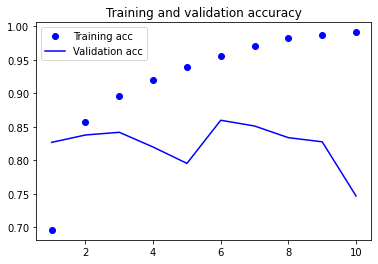

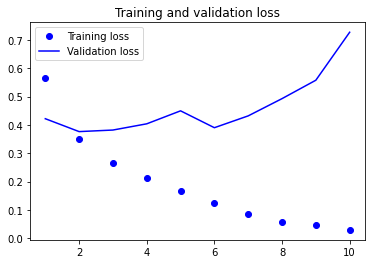

In [24]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()